In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

def SMAPE(pred, true):
    return np.mean(np.abs(pred - true) / (np.abs(pred) + np.abs(true)/2))

In [24]:

file_path = '../dataset/bac/'
file_name = 'bac.csv'
df = pd.read_csv(file_path + file_name)
df = df[['date', 'close']]
df_train = df[0:1410]
df_test = df[1410:1730]


In [25]:
# # build a arima model
# import pmdarima as pm

# model = pm.auto_arima(df_train['close'], trace=True,
#                       error_action='ignore',
#                       suppress_warnings=True)

# # predict
# pred = model.predict(len(df_test))
# smape = SMAPE(pred, df_test['close'])
# print('SMAPE: ', smape)

In [26]:
# build a sarimax model

model = sm.tsa.statespace.SARIMAX(df_train['close'], order=(1, 0, 0), seasonal_order=(2, 1, 0, 12))
model_fit = model.fit()
pred = model_fit.predict(len(df_test))
smape = SMAPE(pred, df_test['close'])
print('SMAPE: ', smape)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43718D-01    |proj g|=  4.09213D-01


 This problem is unconstrained.



At iterate    5    f=  1.81880D-01    |proj g|=  8.51005D-02

At iterate   10    f=  1.67371D-01    |proj g|=  1.98731D-02

At iterate   15    f=  1.66919D-01    |proj g|=  2.88890D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   4.783D-06   1.669D-01
  F =  0.16691873411201705     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SMAPE:  nan


In [27]:
pred = pred.reset_index(drop=True)
pred = pred[:320]

In [33]:
# trues = np.load('true.npy')
trues = df_test['close']
trues = trues.reset_index(drop=True)
trues

0      17.790001
1      17.520000
2      17.620001
3      17.700001
4      17.770000
         ...    
315    17.000000
316    17.969999
317    18.760000
318    19.020000
319    20.080000
Name: close, Length: 320, dtype: float64

In [31]:
pred

0      13.685791
1      13.421376
2      13.216001
3      13.331087
4      13.080294
         ...    
315     7.724852
316     7.376482
317     7.576579
318     7.806396
319     7.853410
Name: predicted_mean, Length: 320, dtype: float64

Text(0, 0.5, 'close price')

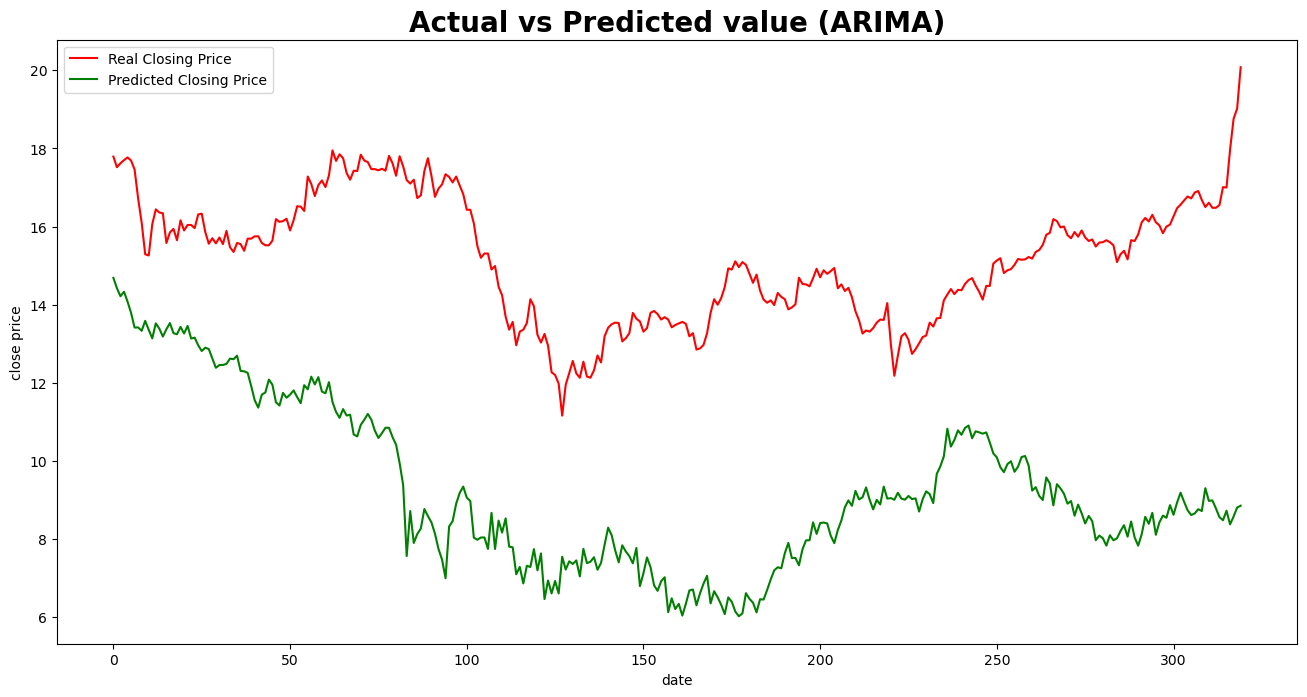

In [37]:
plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(trues, color='red', label = 'Real Closing Price')
plt.plot((pred)+1, color='green', label = 'Predicted Closing Price')
plt.legend(loc='best')

plt.title('Actual vs Predicted value (ARIMA)', size=20, weight='bold')
plt.xlabel('date')
plt.ylabel('close price')